## A. OPIS ZBIORÓW


Zbiór danych Contraceptive Method Choice zawiera informacje o podzbiorze danych z Narodowego Indonezyjskiego Badania Rozpowszechnienia Antykoncepcji z 1987 roku.

Ankietowane to zamężne kobiety, które albo nie były w ciąży, albo nie wiedziały, czy były w czasie wywiadu.

---

Informacje:

*   1473 wierszy z przykładami
*   Rodzaj zmiennych: numeryczne i kategoryczne (takie wartości, których nie można porównywać ze sobą) 
*   Nie ma braujących wartości
*   9 atrybutów:

1. Wiek żony - zmienna numeryczna, (zakres 16-49)
2. Edukacja żony - zmienna kategoyczna, wartości: 1=niski, 2, 3, 4=wysoki
3. Edukacja męża - zmienna kategoyczna, wartości: 1=niski, 2, 3, 4=wysoki
4. Ilość urodzonych dzieci - zmienna numeryczna, (zakres 0-16)
5. Religia żony -zmienn binarna 0=Inne niż Islam, 1=Islam
6. Nie podejmowanie przez żonę pracy - zmiena binarna 0=Tak, 1=Nie
7. Zawód męża - zmienna kategoryczna 1=nisko płatny, 2, 3, 4=wysoko płatny
8. Wskaźnik standardu życia - zmienna  kategoryczna, 1=niski, 2, 3, 4=wysoki
9. Ekspozycja na media - zmienna binarna 0=dobra, 1=niedobra

---
3 klasy:
Stosowana metoda antykoncepcji

1.   Nie stosuje antykoncepcji = 1 
2.   Stosuje długoterminowo    = 2
3.   Stosuje krótkoterminowo   = 3

---

Problemem jest przewidzenie aktualnego wyboru metody antykoncepcji (niestosowanie, metody długoterminowe lub metody krótkoterminowe) kobiety na podstawie jej cech demograficznych i społeczno-ekonomicznych.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import keras 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
import random
from matplotlib import animation, colors

from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from matplotlib import animation, colors

#https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
#link do danych 

#df=pd.read_csv("/content/drive/MyDrive/Inteligencja_obliczeniowa/cmc.data", sep=',', header=None, names= ["Wife's age", "Wife's education", "Husband's education","Number of children ever born","Wife's religion","Wife's now working?","Husband's occupation","Standard-of-living index","Media exposure","Contraceptive method used"])

#print("Ilość wierszy " + str(df.shape[0]))
#df.head()

In [ ]:
df.describe()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [ ]:
#Oryginlne nazwy zmiennych są bardzo długie i trudno się na nich pracuje
df.columns=[
    'Wiek żony',
    'Edukacja żony',
    'Edukacja męża',
    'Dzieci',
    'Religia żony',
    'Zatrudnienie żony',
    'Zawód męża',
    'Index życia',
    'Ekspozycja na media',
    'Metoda antykoncepcji']

In [ ]:
print(df.dtypes)
#Zmienne kategoryczne oraz bool są typu int
#A także wartości które przyjmują np. w kolumnie "Wife's religion" 1,0 są trudne do zrozumienia 

Wiek żony               int64
Edukacja żony           int64
Edukacja męża           int64
Dzieci                  int64
Religia żony            int64
Zatrudnienie żony       int64
Zawód męża              int64
Index życia             int64
Ekspozycja na media     int64
Metoda antykoncepcji    int64
dtype: object


In [ ]:
#Na potrzeby prezentacji danych zmieniamy wartości int na kategoryczne
df_c = df.copy() #kopia do późniejszej pracy

#wife's education
df['Edukacja żony'].replace(1, "niski", inplace=True)
df['Edukacja żony'].replace(2, "średnio niski", inplace=True)
df['Edukacja żony'].replace(3, "średnio wysoki", inplace=True)
df['Edukacja żony'].replace(4, "wysoki", inplace=True)

#husband's education
df['Edukacja męża'].replace(1, "niski", inplace=True)
df['Edukacja męża'].replace(2, "średnio low", inplace=True)
df['Edukacja męża'].replace(3, "średnio wysoki", inplace=True)
df['Edukacja męża'].replace(4, "wysoki", inplace=True)

#wife's religion
df['Religia żony'].replace(1, "Islam", inplace=True)
df['Religia żony'].replace(0, "Inna", inplace=True)

#wife's now working
df['Zatrudnienie żony'].replace(1, "Nie", inplace=True)
df['Zatrudnienie żony'].replace(0, "Tak", inplace=True)
                          
#husband's occupation
df['Zawód męża'].replace(1, "Kategoria 1", inplace=True)
df['Zawód męża'].replace(2, "Kategoria 2", inplace=True)
df['Zawód męża'].replace(3, "Kategoria 3", inplace=True)
df['Zawód męża'].replace(4, "Kategoria 4", inplace=True)
                            
#standards of living index
df['Index życia'].replace(1, "niski", inplace=True)
df['Index życia'].replace(2, "średnio niski", inplace=True)
df['Index życia'].replace(3, "średnio wysoki", inplace=True)
df['Index życia'].replace(4, "wysoki", inplace=True)
                            
#madia exposure
df['Ekspozycja na media'].replace(1, "zła", inplace=True)
df['Ekspozycja na media'].replace(0, "dobra", inplace=True)

#contraceptive methods used
df['Metoda antykoncepcji'].replace(1, "Nie stosuje", inplace=True)
df['Metoda antykoncepcji'].replace(2, "Stosuje długoterminowo", inplace=True)
df['Metoda antykoncepcji'].replace(3, "Stosuje krótkoterminowo", inplace=True)

for col in ['Edukacja żony',
            'Edukacja męża',
            'Religia żony',
            'Zatrudnienie żony',
            'Zawód męża',
            'Index życia',
            'Ekspozycja na media',
            'Metoda antykoncepcji']:
    df[col] = df[col].astype('category')

print(df.dtypes)
df.head()

Wiek żony                  int64
Edukacja żony           category
Edukacja męża           category
Dzieci                     int64
Religia żony            category
Zatrudnienie żony       category
Zawód męża              category
Index życia             category
Ekspozycja na media     category
Metoda antykoncepcji    category
dtype: object


,Wiek żony,Edukacja żony,Edukacja męża,Dzieci,Religia żony,Zatrudnienie żony,Zawód męża,Index życia,Ekspozycja na media,Metoda antykoncepcji
0,24,średnio niski,średnio wysoki,3,Islam,Nie,Kategoria 2,średnio wysoki,dobra,Nie stosuje
1,45,niski,średnio wysoki,10,Islam,Nie,Kategoria 3,wysoki,dobra,Nie stosuje
2,43,średnio niski,średnio wysoki,7,Islam,Nie,Kategoria 3,wysoki,dobra,Nie stosuje
3,42,średnio wysoki,średnio low,9,Islam,Nie,Kategoria 3,średnio wysoki,dobra,Nie stosuje
4,36,średnio wysoki,średnio wysoki,8,Islam,Nie,Kategoria 3,średnio niski,dobra,Nie stosuje


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Wiek Żony vs Dzieci')

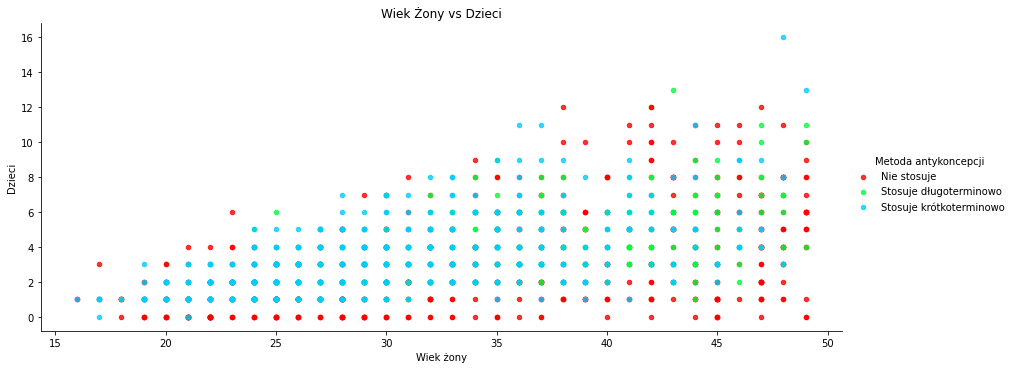

In [ ]:
colors = ["#FF0000", "#00FF3C", "#00CDFF", "yellow"]
sns.set_palette(colors)

sns.lmplot("Wiek żony",  "Dzieci", data=df,fit_reg=False, hue="Metoda antykoncepcji", scatter_kws={"marker": "o","s": 20}, height=5, aspect=12/5)
plt.title('Wiek Żony vs Dzieci')
#Możemy zaobserwowoać na tym wykresie, że wraz z wielkiem zwiększa sie ilość dzieci urodzonych w trakcie życia przez kobiety
#W większości kobiety nie posiadające dzieci lub posiadające ich bardzo dużo, nie stosują antykoncepcji
#Kropki niebiekie i czerowne oznaczające krótko i długoterminowe stosowanie, są ze sobą wymieszane , choć przewaga zielony występuje u strszych kobiet

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


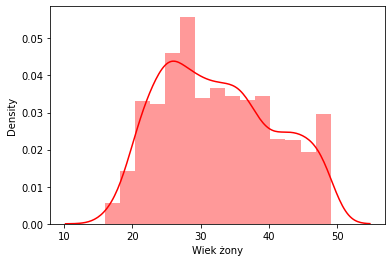

In [ ]:
sns.distplot(df["Wiek żony"], kde=True)
#Wykres prezentuj rozłozenie ilości kobiet w danym wieku

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


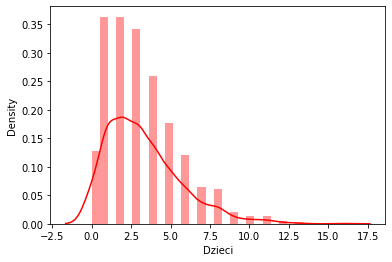

In [ ]:
sns.distplot(df["Dzieci"], kde=True)
#Wykres prezentuj rozłożenie ilości dzieci. Najwięcej kobiet urodziło 2-3 dzieci

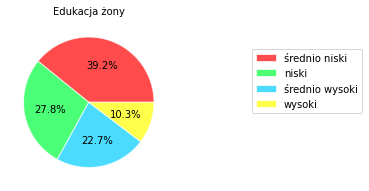

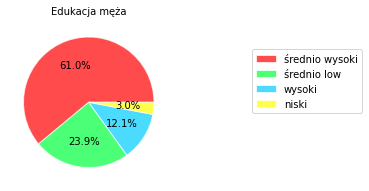

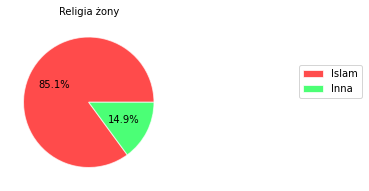

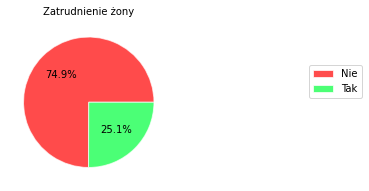

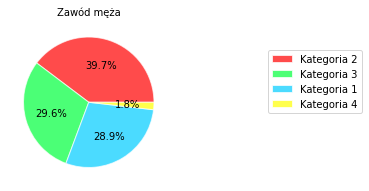

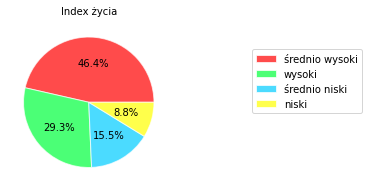

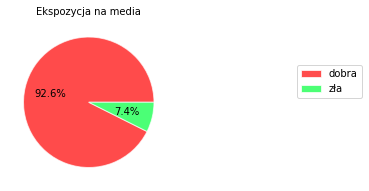

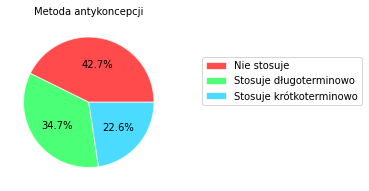

In [ ]:
for col in df.columns:
    if (df[col].dtype.name == 'category'):
        df[col].value_counts().plot(kind='pie',fontsize=10,autopct='%.1f%%',  labels=None,  wedgeprops={'alpha':0.7,'edgecolor':'white'},figsize=(3, 3))
        plt.ylabel('')
        plt.legend(labels=df[col].unique(),bbox_to_anchor=(1.8,0.6), loc="center right", fontsize=10,bbox_transform=plt.gcf().transFigure)
        plt.title(col, size=10)
        plt.show()
 #Dla danych kategorycznych posłużyliśmy się diagramem kołowym, aby przedstawić iloścowy udział konkretnych cech     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


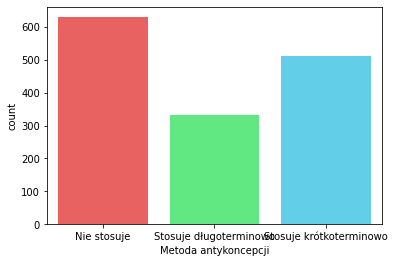

In [ ]:
ax = sns.countplot(df['Metoda antykoncepcji'], alpha=0.7)
#Wykres przezentuje nam ilość danych zaliczanych do konkretnej klasy
#Najwięcej informacji mamy o kobietach nie stosujących atynkoncepcji, a najmniej o stosujących ją długoterminowo

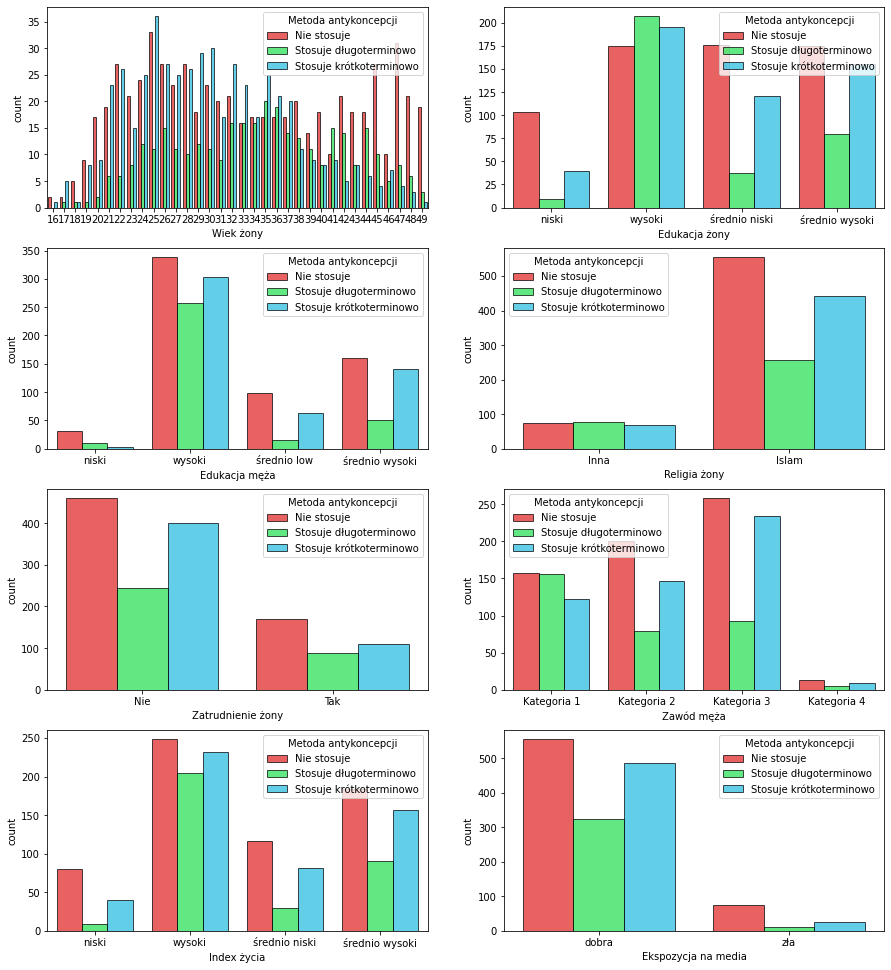

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,17))


for col, ax in zip([
    'Wiek żony',   'Edukacja żony',   'Edukacja męża',   'Religia żony',   'Zatrudnienie żony',   'Zawód męża',   'Index życia',   'Ekspozycja na media', ], ax.flatten()):
    sns.countplot(x=col, hue='Metoda antykoncepcji', data=df, ax=ax,alpha=0.7,edgecolor="black")

#Widzimy tutaj porównanie danych ktegorycznych w zależności od zastosowanej metody 

##B. PRZYGOTOWANIE DANYCH

Nasze zbiór nie zawierał żadnych pustych wartości, klasy były utworzone na podstwie jednej kolumny -> nie wymagał on zbytniej obróbki danych.

Występują w nim jednak wartości kategoryczne, jednak posiadają one określony porządek. Na przykład dla kolumny 'Edukacja żony', wartości 1,2,3,4 stopniują jej poziom od niskiego do wysokiego. 

Podczas podawania danych wejścowych do sieci zastosowaliśmy dwa podeścia: stosujac numeryczne dane kategoryczne oraz kodując każdą wartość binarnie (Zostanie to pokazane niżej w prykładach, nie dawało lepszego elektu dla sieci)

Dane wyjściowe: 3 klasy są kodowane jako wektory binarne 

Dzielimy nasz zbiór na:


1.   zbiór uczący, aby nauczyć nasz model, jak poprawnie klasyfikować przyszłe przykłady
2.   zbiór testowego, aby sprawdzić, jak dobry nasz model przewiduje wyniki

In [ ]:
df_c['Metoda antykoncepcji'] = df_c['Metoda antykoncepcji'].astype('object')
print(df_c.dtypes)
df_c.head()

Wiek żony                int64
Edukacja żony            int64
Edukacja męża            int64
Dzieci                   int64
Religia żony             int64
Zatrudnienie żony        int64
Zawód męża               int64
Index życia              int64
Ekspozycja na media      int64
Metoda antykoncepcji    object
dtype: object


,Wiek żony,Edukacja żony,Edukacja męża,Dzieci,Religia żony,Zatrudnienie żony,Zawód męża,Index życia,Ekspozycja na media,Metoda antykoncepcji
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [ ]:
#Podział na 2 tabele

X = df_c.drop(columns = 'Metoda antykoncepcji')
y = df_c['Metoda antykoncepcji']

print(X)
print(y)

      Wiek żony  Edukacja żony  Edukacja męża  Dzieci  Religia żony  \
0            24              2              3       3             1   
1            45              1              3      10             1   
2            43              2              3       7             1   
3            42              3              2       9             1   
4            36              3              3       8             1   
...         ...            ...            ...     ...           ...   
1468         33              4              4       2             1   
1469         33              4              4       3             1   
1470         39              3              3       8             1   
1471         33              3              3       4             1   
1472         17              3              3       1             1   

      Zatrudnienie żony  Zawód męża  Index życia  Ekspozycja na media  
0                     1           2            3                    0  
1  

## **SIEĆ FFNN**

# C.STRUKTURA SIECI

Próbkowanie danych nie jest wymagane, ponieważ oryginalny zbiór zbiór danych zawiera tylko 1473 obserwacji.

Jak pokazano poniżej, model został podzielony testowo w proporcji 80:20 na 1178 wierszy treningowych oraz 295 wierszy testowych.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

print('Wymiary naszych danych: ')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_test_copy = y_test
y_train_copy = y_train
#print(y_test_copy)
#print(y_train_copy)
#print(y_train.shape)
#print(y_test.shape)
'''
Algorytmy Machine learning nie mogą bezpośrednio pracować z danymi kategorycznymi
one hot encoding vector - reprezentacja zmiennych kategorycznych jako wektory binarne
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''

y_train=np_utils.to_categorical(y_train-1,num_classes=3)
y_test=np_utils.to_categorical(y_test-1,num_classes=3)


print("\nKategoryczne wartości naszych klas zamienione na wektory binarne ")
print(df['Metoda antykoncepcji'][0])
print(df_c['Metoda antykoncepcji'][0])
print(y_train[1])

Wymiary naszych danych: 
(1178, 9)
(295, 9)
(1178,)
(295,)

Kategoryczne wartości naszych klas zamienione na wektory binarne 
Nie stosuje
1
[1. 0. 0.]


In [ ]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)

#Wszystkie wartości mieszczą się teraz w przedziale 0 do 1
#W dalszej cześci zobaczymy jak nasza sieć zachowuje się na znormalizowanych i oryginalych danych

print(X_train.loc[[1]])
print("\n\n")
print(X_train_norm[1])

   Wiek żony  Edukacja żony  Edukacja męża  Dzieci  Religia żony  \
1         45              1              3      10             1   

   Zatrudnienie żony  Zawód męża  Index życia  Ekspozycja na media  
1                  1           3            4                    0  



[0.78787879 0.33333333 0.66666667 0.125      1.         1.
 0.         1.         0.        ]


## MODEL 1

Definujemy nasz pierwszy model, paramery sieci są dobierane eksperyentalnie, żeby móc zaobserwowoać jak się ona zachowuje. 
0. Ilość neuronów na wejściu: 9
1. Ilość warstw ukytych po: 1000 i 50 neuronów
2. Funkcja aktywacyjna: Relu
3. Ilość nueronów na wyjściu: 3
4. Funkcja aktywacyjna: softmax
5. Algorytm optymalizacji: adam 
6. Liczba epok: 100

In [ ]:
#Trenowanie sieci oznacza znalezienie najlepszego zestawu wag do mapowania danych wejściowych na wyjściowe w zbiorze danych.
#Definujemy nasz model sieci
model = Sequential()

# Dodajem warstwę wejściową złożoną z 9 kolumn i pierwszą warstwe ukrytą złożną z 1000 neuronów z funckją aktywacyjną ReLU
model.add(Dense(1000,input_dim=9,activation='relu'))
model.add(Dense(50,activation='relu'))

#Ochrona przed przeuczeniem
model.add(Dropout(0.2))

# Dodajemy warstwę wyjściową z 3 neuronami (klasy 1,2,3) i funkcją aktywacyjną softmax
model.add(Dense(3,activation='softmax'))

# Kompilacja modelu
# loss function - ocena zestawu wag
# optimizer - wyszukiwanie różnych wag dla sieci -> adam: efficient stochastic gradient descent
# metryki - służą do zbierania raportu podczas uczenia.
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# D.UCZENIE SIECI

In [ ]:
#Nauka odbywa się przez pewną ilość epok, a każda epoka jest podzielona na batches (1 lub więcej w zależności od rozmiaru batch_size).
# Epoka: Jedno przejście przez wszystkie wiersze w X_train
# Batch: Jedna lub więcej próbek rozpatrywanych przez model w ramach epoki przed aktualizacją wag - na podstawie numeru rozpatrywanych wierszy
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1)

Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 1.1465 - accuracy: 0.4321 - val_loss: 1.0359 - val_accuracy: 0.4915
Epoch 2/100
59/59 [==============================] - 0s 4ms/step - loss: 1.0262 - accuracy: 0.4813 - val_loss: 1.0660 - val_accuracy: 0.4000
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 1.0351 - accuracy: 0.4397 - val_loss: 1.0458 - val_accuracy: 0.3966
Epoch 4/100
59/59 [==============================] - 0s 4ms/step - loss: 0.9998 - accuracy: 0.4796 - val_loss: 1.0444 - val_accuracy: 0.3864
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 1.0078 - accuracy: 0.4907 - val_loss: 1.0351 - val_accuracy: 0.4407
Epoch 6/100
59/59 [==============================] - 0s 4ms/step - loss: 0.9839 - accuracy: 0.5017 - val_loss: 1.0169 - val_accuracy: 0.4305
Epoch 7/100
59/59 [==============================] - 0s 4ms/step - loss: 0.9795 - accuracy: 0.5161 - val_loss: 1.0070 - val_accuracy: 0.4644
Epoch 8/100
5

## E.WYNIKI

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


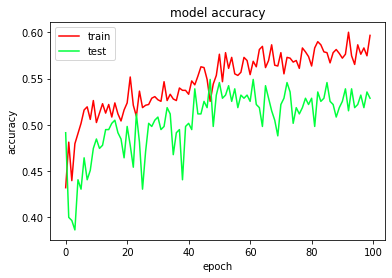

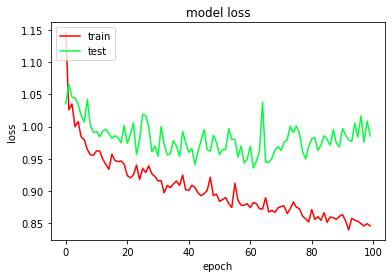

In [ ]:
def accuracy_plot(historyX): 
  print(historyX.history.keys())
  # accuracy
  plt.plot(historyX.history['accuracy'])
  plt.plot(historyX.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  #loss
  plt.plot(historyX.history['loss'])
  plt.plot(historyX.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

accuracy_plot(history)

Najlepiej aby nasz model miał wartości: loss dążace do 0 i accuracy równe 1.0 czyli 100%
Jest to paktycznie niemożliwe do osiągnięcia poniważ zawsze może pojawić się jakis błąd w przewidywaniach.
Naszym celem jest znalezienie najlepszej konfiguracji parametrów aby uzyskać jak najmniejszą wartosć loss oraz jak największą wartość accuracy

Na wykresie możemy zaobserwowoać, że dane treningowe, z każdą epoką zwiększaja swoją dokłądność, a także zmniejszają wartość loss.

Dane testowe, próbują gonić naszą funkcje testową, ale mają mniejszą dokłądnosć i wiekszą wartosć loss

Wskazuje nam to, że nasz model nie najlepiej radzi sobie na danyc testowych

Poniżej obliczyliśmy, że dało nam to dokładność około 53% (w zależności od uruchomienia, ponieważ za każdym razem inaczej-losowo inicjalizujemy wagi co daje nam różne wyniki)

In [ ]:
#Przewidywanie wyniku na danych testowych
def accuracy_results_extended(modelX, df1):
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)

  prediction=modelX.predict(X_test)
  y_proba1 = prediction[:,0] #prawdopodobieństwo dla klasy 1
  #print(y_proba1)

  length=len(prediction)
  y_label=np.argmax(y_test,axis=1)
  #print(y_label)

  predict_label_to_array=np.argmax(prediction,axis=1)+1
  #print(predict_label_to_array)
  predict_label=np.argmax(prediction,axis=1)

  correct_num = np.sum(y_label == predict_label)
  total_num = length
  wrong_num = total_num - correct_num
  accuracy = correct_num * 100/ total_num
  print("Accuracy: " + str(accuracy))
  print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

  print()
  print(classification_report(list(y_test_copy.values), predict_label_to_array))

  df1 = df1.reset_index(drop=True)
  df1['przewidywanie'] = predict_label_to_array
  df1['poprawnie/blednie'] = np.where((df1['przewidywanie'] == df1['Metoda antykoncepcji']), True, False)
  
  print(df1)
  klasa1true = df1[(df1['Metoda antykoncepcji']==1) & (df1['poprawnie/blednie']==True)].shape[0]
  klasa1false = df1[(df1['Metoda antykoncepcji']==1) & (df1['poprawnie/blednie']==False)].shape[0]
  klasa2true = df1[(df1['Metoda antykoncepcji']==2) & (df1['poprawnie/blednie']==True)].shape[0]
  klasa2false = df1[(df1['Metoda antykoncepcji']==2) & (df1['poprawnie/blednie']==False)].shape[0]
  klasa3true = df1[(df1['Metoda antykoncepcji']==3) & (df1['poprawnie/blednie']==True)].shape[0]
  klasa3false = df1[(df1['Metoda antykoncepcji']==3) & (df1['poprawnie/blednie']==False)].shape[0]
  print("Klasa 1 prawidłowo: {}, Klasa 1 błędnie {}".format(klasa1true, klasa1false))
  print("Klasa 2 prawidłowo: {}, Klasa 2 błędnie {}".format(klasa2true, klasa2false))
  print("Klasa 3 prawidłowo: {}, Klasa 3 błędnie {}".format(klasa3true, klasa3false))

  #df_klasa1=df1.loc[(df1['Metoda antykoncepcji']==1)]
  #print(df_klasa1)


df1=pd.DataFrame(y_test_copy)
accuracy_results_extended(model, df1)

10/10 [==============================] - 0s 3ms/step
Accuracy: 52.88135593220339
Liczba prawidłowych przewidywań: 156, Ilość wierszy w zbiorze testowym: 295, Ilość błędnych przewidywań 139

              precision    recall  f1-score   support

           1       0.73      0.53      0.61       118
           2       0.48      0.28      0.35        75
           3       0.44      0.72      0.54       102

    accuracy                           0.53       295
   macro avg       0.55      0.51      0.50       295
weighted avg       0.57      0.53      0.52       295

    Metoda antykoncepcji  przewidywanie  poprawnie/blednie
0                      2              3              False
1                      3              1              False
2                      1              2              False
3                      1              3              False
4                      2              1              False
..                   ...            ...                ...
290             

Wypisaliśmy wyniki jakie daje nam sieć. Utworzona została również tablica do porónania oczekowanego wyniku klasu vs wynik jaki dała nam sieć, oraz informację czy sa one takie same czy różne. Dla ilości danych 295 w zbiorze testowym mogliśmy sobie na to pozwolić.

* Ilość prawidłowych przewidywań: 156
* Ilość błędnych przewidywań 139

* Klasa 1 prawidłowo: 62, Klasa 1 błędnie 56
* Klasa 2 prawidłowo: 21, Klasa 2 błędnie 54
* Klasa 3 prawidłowo: 73, Klasa 3 błędnie 29

Daje nam to prawdopodobieństwo około 53%

# F.DOSTRAJANIE PARAMETRÓW - TESOWANIE INNYCH KONFIGURACJI

## INPUT JAKO WEKTOR

Dla danych kategorycznyc zastosowaliśy kodowanie wartości na wekroty bianrne. W taki sposób wartości z kolumny na przykład 'Edukacja żony' zostały zakodowane następujaco
1 --> [1 0 0 0 ]
2 --> [0 1 0 0 ]
3 --> [0 0 1 0 ]
4 --> [0 0 0 1 ]

In [ ]:
print(df.dtypes)

df_copy = df.copy()
for i in df_copy.columns:
  if df_copy[i].dtypes == 'category':
    y = pd.get_dummies(df_copy[i], prefix=i)
    df_copy = df_copy.drop(columns = i)
    df_copy = pd.concat([df_copy, y], axis=1)

df_copy

NameError: ignored

In [ ]:
cols = df_copy.columns.to_list()

In [ ]:
X=df_copy.drop(columns = ['Metoda antykoncepcji_Nie stosuje', 'Metoda antykoncepcji_Stosuje długoterminowo', 'Metoda antykoncepcji_Stosuje krótkoterminowo'])
X

,Wiek żony,Dzieci,Edukacja żony_niski,Edukacja żony_wysoki,Edukacja żony_średnio niski,Edukacja żony_średnio wysoki,Edukacja męża_niski,Edukacja męża_wysoki,Edukacja męża_średnio low,Edukacja męża_średnio wysoki,...,Zawód męża_Kategoria 1,Zawód męża_Kategoria 2,Zawód męża_Kategoria 3,Zawód męża_Kategoria 4,Index życia_niski,Index życia_wysoki,Index życia_średnio niski,Index życia_średnio wysoki,Ekspozycja na media_dobra,Ekspozycja na media_zła
0,24,3,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,45,10,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,43,7,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,42,9,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,36,8,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,2,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1469,33,3,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1470,39,8,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1471,33,4,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
y = df_c['Metoda antykoncepcji']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

y_test_copy = y_test

print(X_train.shape)

y_train=np_utils.to_categorical(y_train-1,num_classes=3)
y_test=np_utils.to_categorical(y_test-1,num_classes=3)


(1178, 24)


Dane identyczne jak w pierwszym modelu poza ilością neuronów na wejściu = 24
\

Epoch 1/100
59/59 [==============================] - 2s 11ms/step - loss: 2.2808 - accuracy: 0.3514 - val_loss: 1.1303 - val_accuracy: 0.3763
Epoch 2/100
59/59 [==============================] - 0s 6ms/step - loss: 1.4243 - accuracy: 0.3701 - val_loss: 1.0507 - val_accuracy: 0.3797
Epoch 3/100
59/59 [==============================] - 0s 7ms/step - loss: 1.1289 - accuracy: 0.4431 - val_loss: 1.0388 - val_accuracy: 0.4203
Epoch 4/100
59/59 [==============================] - 0s 6ms/step - loss: 1.0037 - accuracy: 0.4771 - val_loss: 1.0169 - val_accuracy: 0.4780
Epoch 5/100
59/59 [==============================] - 0s 5ms/step - loss: 0.9814 - accuracy: 0.4890 - val_loss: 1.0776 - val_accuracy: 0.3966
Epoch 6/100
59/59 [==============================] - 0s 5ms/step - loss: 0.9633 - accuracy: 0.5153 - val_loss: 0.9916 - val_accuracy: 0.4847
Epoch 7/100
59/59 [==============================] - 0s 6ms/step - loss: 0.9573 - accuracy: 0.4958 - val_loss: 0.9953 - val_accuracy: 0.4780
Epoch 8/100


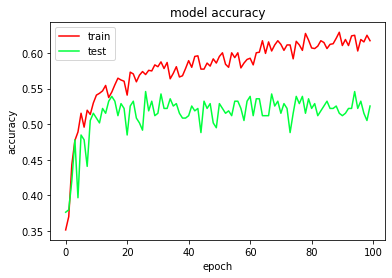

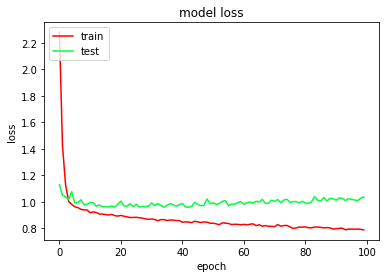

10/10 [==============================] - 0s 3ms/step
Accuracy: 52.54237288135593
Liczba prawidłowych przewidywań: 155, Ilość wierszy w zbiorze testowym: 295, Ilość błędnych przewidywań 140


In [ ]:
model33 = Sequential()

model33.add(Dense(100,input_dim=24,activation='relu'))
model33.add(Dense(50,activation='relu'))


model33.add(Dropout(0.2))

model33.add(Dense(3,activation='softmax'))

model33.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history33 = model33.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1)

accuracy_plot(history33)

prediction=model33.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label_to_array=np.argmax(prediction,axis=1)+1
predict_label=np.argmax(prediction,axis=1)
correct_num = np.sum(y_label == predict_label)
total_num = length
wrong_num = total_num - correct_num
accuracy = correct_num * 100/ total_num
print("Accuracy: " + str(accuracy))
print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

Wykres dokładności: jest bardzo podobny dla danych treningowych jak dla poprzedniego modelu, jednak testowe bardzo szybko stabilizuj się na poziomie 50% i nie chcą dalej rosnąć.

Wyniki dla danych kategorycznych jako wektory binarne (accuacy 52%) są gorsze niz dla danych numerycznych (53%). Dlatego w dalszej części praujemy z pierwszym sposobem

##NORMALIZACJA

Dla modelu o takich samych parametrach jak w modelu 1 próbujemy przeprowadzić obliczenia ale na znormalizowanych danych z zakresu [0,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

y_test_copy = y_test
y_train_copy = y_train

y_train=np_utils.to_categorical(y_train-1,num_classes=3)
y_test=np_utils.to_categorical(y_test-1,num_classes=3)


model7 = Sequential()
model7.add(Dense(1000,input_dim=9,activation='relu'))
model7.add(Dense(50,activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(3,activation='softmax'))
model7.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history7 = model7.fit(X_train_norm,y_train,validation_data=(X_test_norm,y_test),batch_size=20,epochs=100,verbose=1)


Epoch 1/100
59/59 [==============================] - 1s 8ms/step - loss: 1.0439 - accuracy: 0.4304 - val_loss: 1.0198 - val_accuracy: 0.4373
Epoch 2/100
59/59 [==============================] - 0s 5ms/step - loss: 1.0065 - accuracy: 0.4601 - val_loss: 0.9808 - val_accuracy: 0.5119
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 0.9714 - accuracy: 0.4975 - val_loss: 1.0292 - val_accuracy: 0.4237
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 0.9640 - accuracy: 0.4907 - val_loss: 0.9791 - val_accuracy: 0.5153
Epoch 5/100
59/59 [==============================] - 0s 5ms/step - loss: 0.9545 - accuracy: 0.5314 - val_loss: 0.9806 - val_accuracy: 0.5085
Epoch 6/100
59/59 [==============================] - 0s 4ms/step - loss: 0.9430 - accuracy: 0.5416 - val_loss: 1.0097 - val_accuracy: 0.4339
Epoch 7/100
59/59 [==============================] - 0s 5ms/step - loss: 0.9382 - accuracy: 0.5280 - val_loss: 0.9915 - val_accuracy: 0.4847
Epoch 8/100
5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


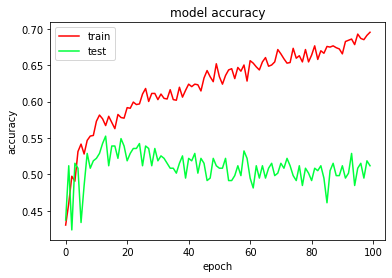

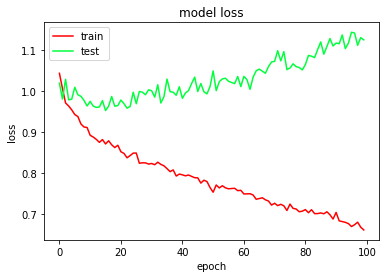

In [ ]:
accuracy_plot(history7)

In [ ]:
prediction=model7.predict(X_test_norm)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label_to_array=np.argmax(prediction,axis=1)+1
predict_label=np.argmax(prediction,axis=1)

correct_num = np.sum(y_label == predict_label)
total_num = length
wrong_num = total_num - correct_num
accuracy = correct_num * 100/ total_num
print("Accuracy: " + str(accuracy))
print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

print()
print(classification_report(list(y_test_copy.values), predict_label_to_array))

10/10 [==============================] - 0s 2ms/step
Accuracy: 51.186440677966104
Liczba prawidłowych przewidywań: 151, Ilość wierszy w zbiorze testowym: 295, Ilość błędnych przewidywań 144

              precision    recall  f1-score   support

           1       0.68      0.47      0.55       118
           2       0.42      0.35      0.38        75
           3       0.46      0.69      0.55       102

    accuracy                           0.51       295
   macro avg       0.52      0.50      0.49       295
weighted avg       0.54      0.51      0.51       295



Znormalizowane dane dały nam jeszcze mnieją dokłądność 51%
Nie ma dużej różnicy pomiędzy wartościamy w naym zbiorze, dlatego pozostaniemy przy oyginlnych danych.

Wykres dokładności: na 100 epokach wykres dla danych treningowych zaczłą osigać wyższe wartości niż dla oryginalnych, jednak testowe osiągały niskie wartości,a przy kolejnycj epokach zaczeły wręcz spadać z dokłądnością wyników.


## Więcej epok, większy batch size

Zmienimy batch size z 20 na 100, a epoki z 100 na 120, pozostałe parametry zostają takie same

In [ ]:
model2 = Sequential()

model2.add(Dense(1000,input_dim=9,activation='relu'))
model2.add(Dense(50,activation='relu'))

model2.add(Dense(3,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history2 = model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=100,epochs=110,verbose=1)

Epoch 1/110
12/12 [==============================] - 1s 24ms/step - loss: 1.3644 - accuracy: 0.4058 - val_loss: 1.1553 - val_accuracy: 0.2542
Epoch 2/110
12/12 [==============================] - 0s 8ms/step - loss: 1.0526 - accuracy: 0.4414 - val_loss: 1.0546 - val_accuracy: 0.4644
Epoch 3/110
12/12 [==============================] - 0s 8ms/step - loss: 1.0040 - accuracy: 0.5119 - val_loss: 1.0628 - val_accuracy: 0.4441
Epoch 4/110
12/12 [==============================] - 0s 9ms/step - loss: 0.9793 - accuracy: 0.5153 - val_loss: 1.0228 - val_accuracy: 0.4644
Epoch 5/110
12/12 [==============================] - 0s 8ms/step - loss: 0.9639 - accuracy: 0.5195 - val_loss: 0.9801 - val_accuracy: 0.5085
Epoch 6/110
12/12 [==============================] - 0s 9ms/step - loss: 0.9367 - accuracy: 0.5543 - val_loss: 1.0163 - val_accuracy: 0.4644
Epoch 7/110
12/12 [==============================] - 0s 8ms/step - loss: 0.9505 - accuracy: 0.5374 - val_loss: 0.9977 - val_accuracy: 0.4915
Epoch 8/110


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


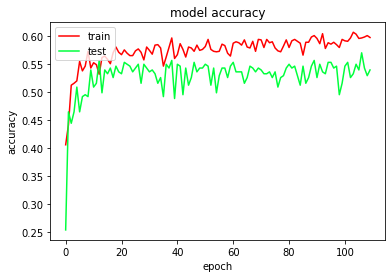

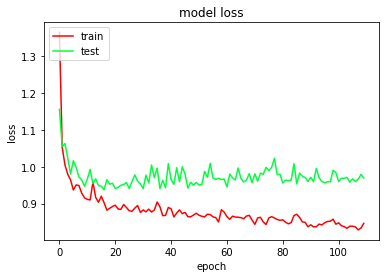

In [ ]:
accuracy_plot(history2)

In [ ]:
prediction=model2.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label_to_array=np.argmax(prediction,axis=1)+1
predict_label=np.argmax(prediction,axis=1)

correct_num = np.sum(y_label == predict_label)
total_num = length
wrong_num = total_num - correct_num
accuracy = correct_num * 100/ total_num
print("Accuracy: " + str(accuracy))
print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

print()
print(classification_report(list(y_test_copy.values), predict_label_to_array))

10/10 [==============================] - 0s 2ms/step
Accuracy: 53.898305084745765
Liczba prawidłowych przewidywań: 159, Ilość wierszy w zbiorze testowym: 295, Ilość błędnych przewidywań 136

              precision    recall  f1-score   support

           1       0.67      0.51      0.58       118
           2       0.46      0.49      0.48        75
           3       0.49      0.61      0.54       102

    accuracy                           0.54       295
   macro avg       0.54      0.54      0.53       295
weighted avg       0.56      0.54      0.54       295



Zmiana ta spowodowała szybsze wykonywanie kodu.
Uzyskana dokładność jest podobna jak poprzednio. 

##Testowanie różnych alorytmów optymalizacji

Pozostałe parametry pozostją takie same. Iteracynie sprawdzamy następujace algorytmy:

1. Mini-batch GD - dało nam dokłądnosć około 53%
2. Momentum GD - dało nam dokłądnosć około 54% - uzyskaliśmy tutaj również najlepiej wygladający wykres w porównaniu do pozostałych
3. RMS Prop - dało nam dokłądnosć około 52%
4. Adam - dało nam dokłądnosć około 53%

Również na zbiorczym wykresie możemy zobaczyć porównanie tych 4 algorytmów

Mimo lepszego wyniku dla Momentum GD to czas oscylujemy dookoła tych samych wartości

Training the model with optimizer Mini-batch GD
Epoch 1/100
37/37 [==============================] - 1s 14ms/step - loss: 1.0599 - accuracy: 0.4346 - val_loss: 1.0927 - val_accuracy: 0.4441
Epoch 2/100
37/37 [==============================] - 0s 11ms/step - loss: 1.0497 - accuracy: 0.4491 - val_loss: 1.0547 - val_accuracy: 0.4169
Epoch 3/100
37/37 [==============================] - 0s 11ms/step - loss: 1.0341 - accuracy: 0.4728 - val_loss: 1.0457 - val_accuracy: 0.4203
Epoch 4/100
37/37 [==============================] - 0s 11ms/step - loss: 1.0314 - accuracy: 0.4694 - val_loss: 1.0426 - val_accuracy: 0.4508
Epoch 5/100
37/37 [==============================] - 0s 11ms/step - loss: 1.0206 - accuracy: 0.4898 - val_loss: 1.0523 - val_accuracy: 0.4576
Epoch 6/100
37/37 [==============================] - 0s 9ms/step - loss: 1.0130 - accuracy: 0.4856 - val_loss: 1.0945 - val_accuracy: 0.4000
Epoch 7/100
37/37 [==============================] - 0s 10ms/step - loss: 1.0020 - accuracy: 0.5051 -

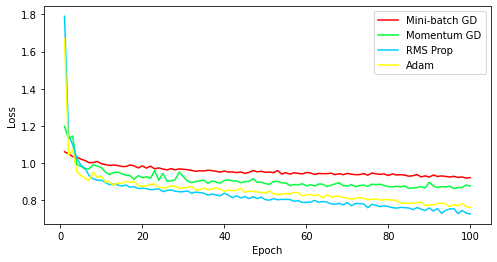

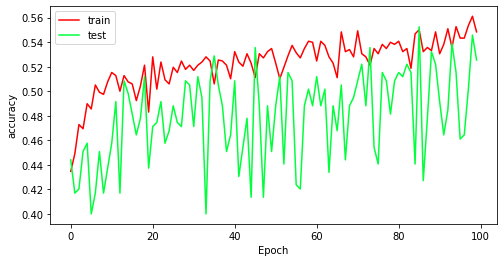

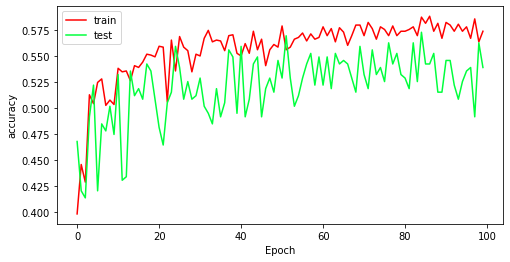

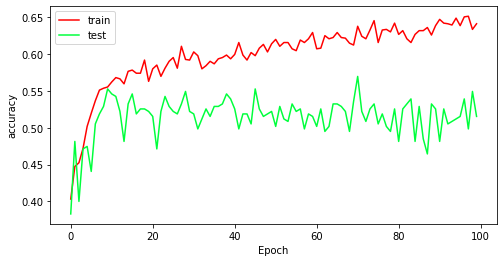

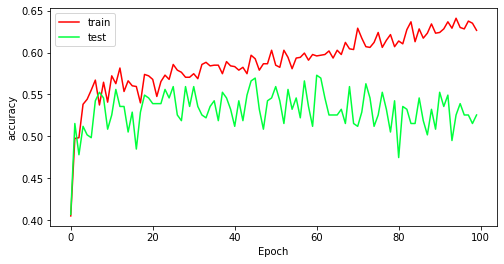

In [ ]:
my_optimizers = {"Mini-batch GD":tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.0),
                 "Momentum GD":tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),
                 "RMS Prop":tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9),
                 "Adam":tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
                  }

histories = {}
for optimizer_name, optimizer in my_optimizers.items():
    # Definiujemy naszą sieć

    my_network = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_dim=9),                    
                tf.keras.layers.Dense(1000, activation='relu'),
                tf.keras.layers.Dense(500, activation='relu'),
                tf.keras.layers.Dense(3, activation='softmax')
                ])
    

    # Kompilujemy model
    my_network.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    print('Training the model with optimizer {}'.format(optimizer_name))
    histories[optimizer_name] = my_network.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, verbose=1)

    prediction=my_network.predict(X_test)
    length=len(prediction)
    y_label=np.argmax(y_test,axis=1)
    predict_label_to_array=np.argmax(prediction,axis=1)+1
    predict_label=np.argmax(prediction,axis=1)

    correct_num = np.sum(y_label == predict_label)
    total_num = length
    wrong_num = total_num - correct_num
    accuracy = correct_num * 100/ total_num
    print("Accuracy: " + str(accuracy))
    print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

    print()
    print(classification_report(list(y_test_copy.values), predict_label_to_array))

plt.figure(figsize=(8, 4))

# Plot learning curves
for optimizer_name, history in histories.items():
    loss = history.history['loss']
    epochs = range(1,len(loss)+1)
    plt.plot(epochs, loss, label=optimizer_name)
    plt.legend(loc="upper right")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

plt.show()

for optimizer_name, history in histories.items():
    plt.figure(figsize=(8, 4))
    plt.plot(label=optimizer_name)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.show()

##Testowanie różnych alorytmów funkcji loss

Poprzednim razem MOMENTUM GD dało nam najlepszy wynik, wiec spróbujemy użyć do do sprawdzenia najlpszej funkcji loss 
Pozostałe parametry pozostją takie same. Iteracynie sprawdzamy następujace funkcje:

1. Mean squared error - dało nam dokładnosć około 49%
2. Categorical crossentropy - dało nam dokładnosć około 53% - najlepiej wyglądający wykres
3. Mean squared logarithmic error - dało nam dokładnosć około 51%

Cały czas oscylujemy dookoła tych samych wartości

Training the model with LOSS MSE
Epoch 1/100
37/37 [==============================] - 1s 15ms/step - loss: 0.2289 - accuracy: 0.3905 - val_loss: 0.2248 - val_accuracy: 0.4000
Epoch 2/100
37/37 [==============================] - 0s 11ms/step - loss: 0.2092 - accuracy: 0.4830 - val_loss: 0.2144 - val_accuracy: 0.3797
Epoch 3/100
37/37 [==============================] - 0s 12ms/step - loss: 0.2101 - accuracy: 0.4626 - val_loss: 0.2102 - val_accuracy: 0.4949
Epoch 4/100
37/37 [==============================] - 0s 12ms/step - loss: 0.2065 - accuracy: 0.4805 - val_loss: 0.2215 - val_accuracy: 0.4136
Epoch 5/100
37/37 [==============================] - 0s 12ms/step - loss: 0.2036 - accuracy: 0.4711 - val_loss: 0.2146 - val_accuracy: 0.4441
Epoch 6/100
37/37 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.5008 - val_loss: 0.2051 - val_accuracy: 0.4271
Epoch 7/100
37/37 [==============================] - 0s 12ms/step - loss: 0.1996 - accuracy: 0.4949 - val_loss: 0.2

<Figure size 576x288 with 0 Axes>

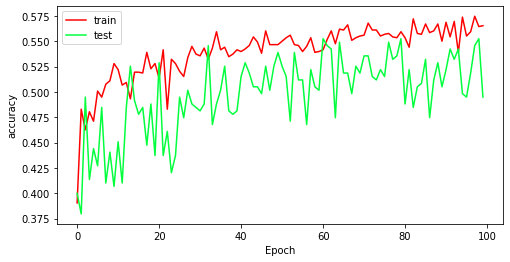

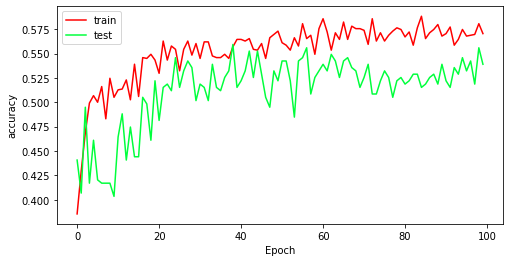

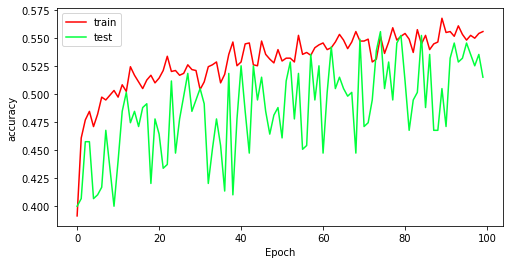

In [ ]:
my_loss = {'MSE':'mean_squared_error','CAT' :'categorical_crossentropy', 'MSEL' : 'mean_squared_logarithmic_error' }

histories = {}
for loss_name, los in my_loss.items():
    # Define a neural network

    my_network = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_dim=9),                    
                tf.keras.layers.Dense(1000, activation='relu'),
                tf.keras.layers.Dense(500, activation='relu'),
                tf.keras.layers.Dense(3, activation='softmax')
                ])
    

    # MOMENTUM GD dało nam poprzednio najlepszy wynik
    my_network.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),loss=los,metrics=['accuracy'])
    
    print('Training the model with LOSS {}'.format(loss_name))
    histories[loss_name] = my_network.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, verbose=1)

    prediction=my_network.predict(X_test)
    length=len(prediction)
    y_label=np.argmax(y_test,axis=1)
    predict_label_to_array=np.argmax(prediction,axis=1)+1
    predict_label=np.argmax(prediction,axis=1)

    correct_num = np.sum(y_label == predict_label)
    total_num = length
    wrong_num = total_num - correct_num
    accuracy = correct_num * 100/ total_num
    print("Accuracy: " + str(accuracy))
    print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

    print()
    print(classification_report(list(y_test_copy.values), predict_label_to_array))

plt.figure(figsize=(8, 4))


for optimizer_name, history in histories.items():
    plt.figure(figsize=(8, 4))
    plt.plot(label=optimizer_name)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.show()

## Testowanie różnych funkcji aktywacyjnych


Iteracynie sprawdzamy następujace funkcje:

1. ELU - 53%
2. RELU - 53% (w poprzednich uruchomieniach sprawdzała się najlepiej)
3. LINEAR - 47%
4. TANGENS - 53%
5. LEAKY RELU - 53%
6. SELU - 56% (w poprzednich uruchomieniach nie osiągała takich wartości)
7. SOFTMAX (pomimo że jest raczej dedykowana do wyjściowej warstwy, wksperymentalnie sprawzamy jj działnie) - 40%

Cały czas oscylujemy dookoła tych samych wartości

Training the model with ACTIVATION FUNCTION EUL
Epoch 1/100
37/37 [==============================] - 2s 26ms/step - loss: 1.3686 - accuracy: 0.3879 - val_loss: 1.1573 - val_accuracy: 0.3661
Epoch 2/100
37/37 [==============================] - 1s 18ms/step - loss: 1.0754 - accuracy: 0.4711 - val_loss: 1.0349 - val_accuracy: 0.4068
Epoch 3/100
37/37 [==============================] - 1s 22ms/step - loss: 1.0305 - accuracy: 0.4958 - val_loss: 1.1053 - val_accuracy: 0.3932
Epoch 4/100
37/37 [==============================] - 1s 26ms/step - loss: 1.0208 - accuracy: 0.5017 - val_loss: 1.1104 - val_accuracy: 0.4407
Epoch 5/100
37/37 [==============================] - 1s 20ms/step - loss: 1.0601 - accuracy: 0.4830 - val_loss: 1.2863 - val_accuracy: 0.3966
Epoch 6/100
37/37 [==============================] - 1s 17ms/step - loss: 1.0011 - accuracy: 0.4975 - val_loss: 1.1315 - val_accuracy: 0.4780
Epoch 7/100
37/37 [==============================] - 1s 17ms/step - loss: 0.9728 - accuracy: 0.5340 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


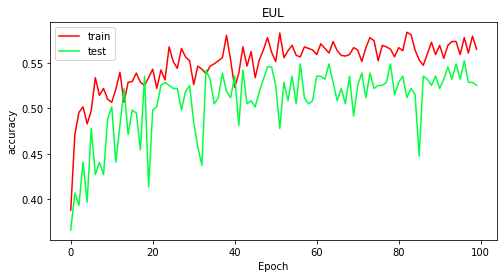

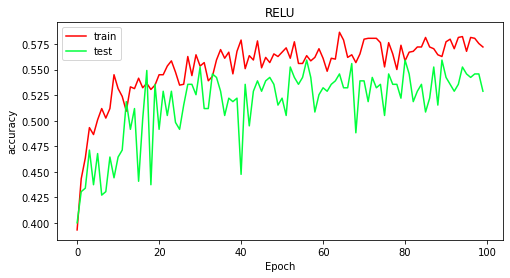

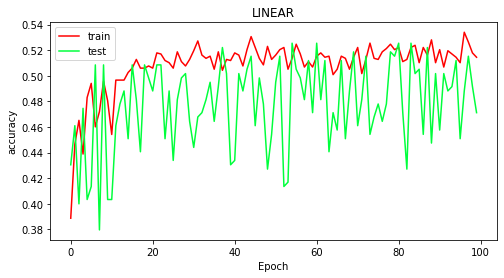

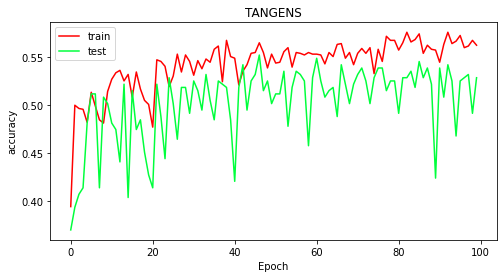

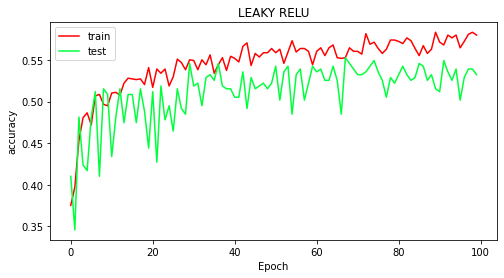

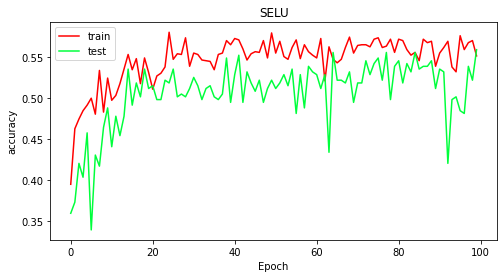

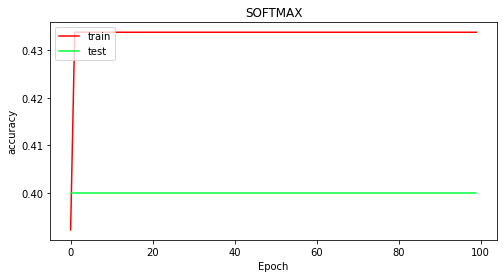

In [ ]:
from tensorflow.keras.layers import LeakyReLU
my_act_function = {'EUL': 'elu', 'RELU':'relu','LINEAR' :'linear', 'TANGENS' : 'tanh', "LEAKY RELU": tf.keras.layers.LeakyReLU(alpha=0.3), 'SELU' : 'selu', 'SOFTMAX': 'softmax'}

histories = {}
for act_name, act in my_act_function.items():
    # Define a neural network

    my_network = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_dim=9),                    
                tf.keras.layers.Dense(1000, activation=act),
                tf.keras.layers.Dense(500, activation=act),
                tf.keras.layers.Dense(3, activation='softmax')
                ])
    

    # Compile the model
    my_network.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),loss='categorical_crossentropy',metrics=['accuracy'])
    # Train the model
    print('Training the model with ACTIVATION FUNCTION {}'.format(act_name))
    histories[act_name] = my_network.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, verbose=1)

    prediction=my_network.predict(X_test)
    length=len(prediction)
    y_label=np.argmax(y_test,axis=1)
    predict_label_to_array=np.argmax(prediction,axis=1)+1
    predict_label=np.argmax(prediction,axis=1)

    correct_num = np.sum(y_label == predict_label)
    total_num = length
    wrong_num = total_num - correct_num
    accuracy = correct_num * 100/ total_num
    print("Accuracy: " + str(accuracy))
    print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

    print()
    print(classification_report(list(y_test_copy.values), predict_label_to_array))



for act_name, history in histories.items():
    plt.figure(figsize=(8, 4))
    #plt.plot(label=act_name)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.title(act_name)
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.show()

## Więcej warstw ukrytych 

Mamy teraz 3 warstwy ukrtywe, na każdej po 100 neurownów.

Dało nam to wynik około 51% dokładności

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.2010 - accuracy: 0.4253 - val_loss: 1.0690 - val_accuracy: 0.4203
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0255 - accuracy: 0.4949 - val_loss: 1.0686 - val_accuracy: 0.4644
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0124 - accuracy: 0.4890 - val_loss: 1.0640 - val_accuracy: 0.4780
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9794 - accuracy: 0.5136 - val_loss: 1.0128 - val_accuracy: 0.4644
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9635 - accuracy: 0.5204 - val_loss: 1.0304 - val_accuracy: 0.4678
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9388 - accuracy: 0.5441 - val_loss: 0.9958 - val_accuracy: 0.5220
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9592 - accuracy: 0.5025 - val_loss: 0.9903 - val_accuracy: 0.5288
Epoch 8/100


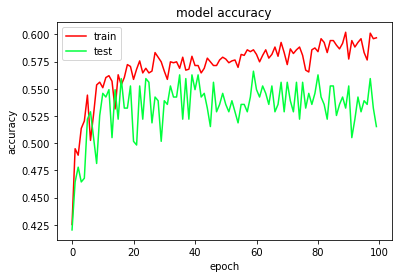

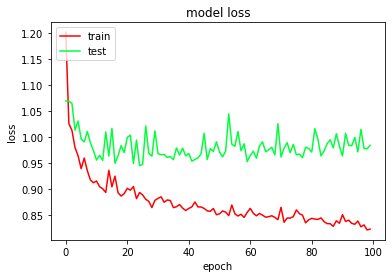

10/10 [==============================] - 0s 4ms/step
Accuracy: 51.52542372881356
Liczba prawidłowych przewidywań: 152, Ilość wierszy w zbiorze testowym: 295, Ilość błędnych przewidywań 143

              precision    recall  f1-score   support

           1       0.68      0.50      0.58       118
           2       0.46      0.44      0.45        75
           3       0.44      0.59      0.50       102

    accuracy                           0.52       295
   macro avg       0.53      0.51      0.51       295
weighted avg       0.54      0.52      0.52       295



In [ ]:
#Dodpajemy kolejną warstwę ukrytą 
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input((9,)))
model3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model3.add(tf.keras.layers.Dense(3, activation = 'softmax'))
model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history3 = model3.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 100, batch_size=50, verbose=1, use_multiprocessing=True)

accuracy_plot(history3)

prediction=model3.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label_to_array=np.argmax(prediction,axis=1)+1
predict_label=np.argmax(prediction,axis=1)

correct_num = np.sum(y_label == predict_label)
total_num = length
wrong_num = total_num - correct_num
accuracy = correct_num * 100/ total_num
print("Accuracy: " + str(accuracy))
print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))
print()
print(classification_report(list(y_test_copy.values), predict_label_to_array))

Iteracyjnie przetestujemy rożne ilości neuronów przy 1 warstwie ukrytej 
Zakres dokłądności jest od 48 - 53 %

Training the model with WYMIAREM UKRYTYCH WARTSW 10
Epoch 1/100
37/37 [==============================] - 2s 28ms/step - loss: 5.6166 - accuracy: 0.4338 - val_loss: 3.5601 - val_accuracy: 0.4000
Epoch 2/100
37/37 [==============================] - 0s 9ms/step - loss: 2.1590 - accuracy: 0.4202 - val_loss: 1.2420 - val_accuracy: 0.4508
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 1.0885 - accuracy: 0.4618 - val_loss: 1.0978 - val_accuracy: 0.4508
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 1.0722 - accuracy: 0.4601 - val_loss: 1.0782 - val_accuracy: 0.4271
Epoch 5/100
37/37 [==============================] - 0s 10ms/step - loss: 1.0592 - accuracy: 0.4601 - val_loss: 1.0735 - val_accuracy: 0.4441
Epoch 6/100
37/37 [==============================] - 0s 11ms/step - loss: 1.0526 - accuracy: 0.4576 - val_loss: 1.0684 - val_accuracy: 0.4576
Epoch 7/100
37/37 [==============================] - 0s 10ms/step - loss: 1.0471 - accuracy: 0.4635

<Figure size 576x288 with 0 Axes>

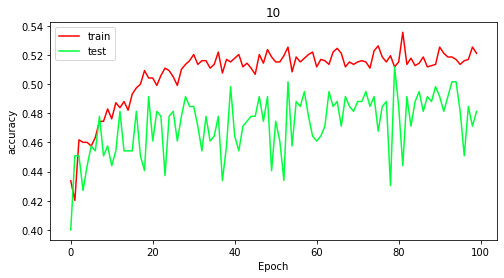

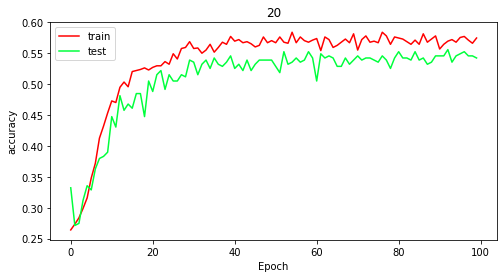

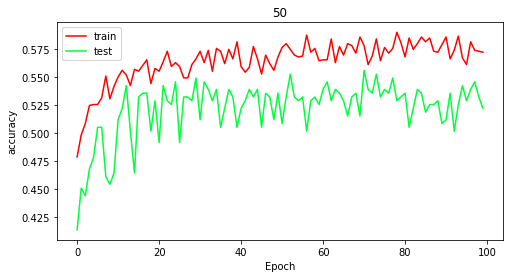

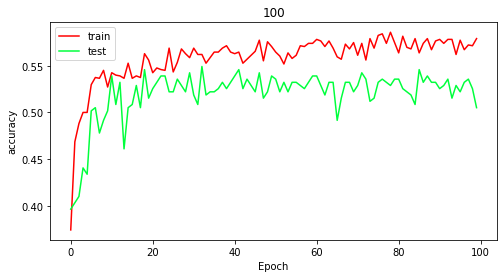

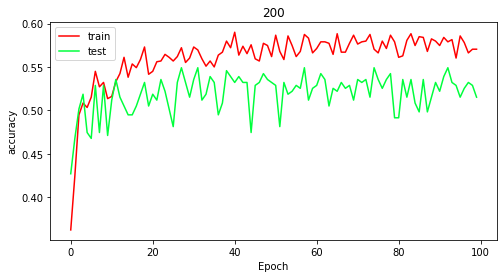

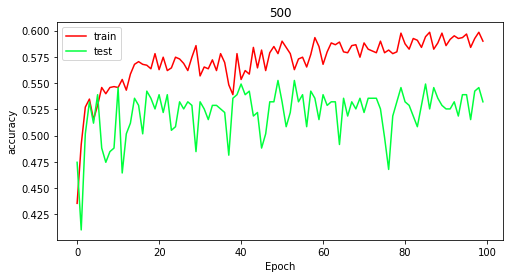

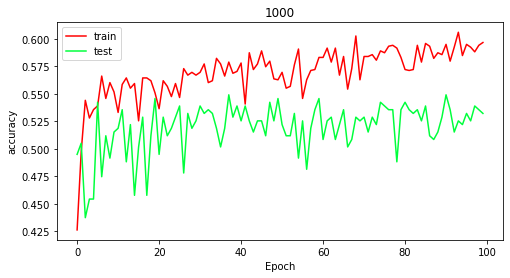

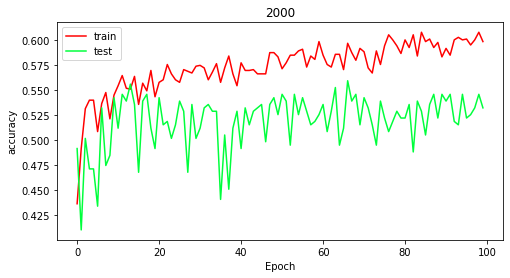

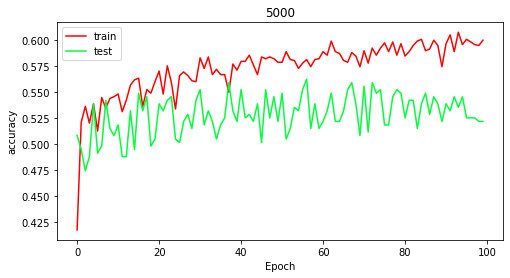

In [ ]:
my_hidden = {'10':10, '20':20, '50':50, '100':100, '200':200, '500':500, '1000':1000, '2000':2000,'5000':5000}

histories = {}
for hidden_name, hid in my_hidden.items():
    # Define a neural network

    my_network = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_dim=9),                    
                tf.keras.layers.Dense(hid, activation='relu'),
                tf.keras.layers.Dense(3, activation='softmax')
                ])
    

    # Compile the model
    my_network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    # Train the model
    print('Training the model with WYMIAREM UKRYTYCH WARTSW {}'.format(hidden_name))
    histories[hidden_name] = my_network.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, verbose=1)

    prediction=my_network.predict(X_test)
    length=len(prediction)
    y_label=np.argmax(y_test,axis=1)
    predict_label_to_array=np.argmax(prediction,axis=1)+1
    predict_label=np.argmax(prediction,axis=1)

    correct_num = np.sum(y_label == predict_label)
    total_num = length
    wrong_num = total_num - correct_num
    accuracy = correct_num * 100/ total_num
    print("Accuracy: " + str(accuracy))
    print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

    print()
    print(classification_report(list(y_test_copy.values), predict_label_to_array))

plt.figure(figsize=(8, 4))


for hid_name, history in histories.items():
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.title(hid_name)
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.show()

Iteracyjnie przetestujemy rożne ilości neuronów przy 2 warstwach ukrytych. pierwsza 500 nueronów, druga doświadczalnie
Zakres dokładności jest od 47 - 54 %

Training the model with WYMIAREM UKRYTYCH WARTSW 10
Epoch 1/100
37/37 [==============================] - 1s 8ms/step - loss: 1.1115 - accuracy: 0.4295 - val_loss: 1.0678 - val_accuracy: 0.3729
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 1.0450 - accuracy: 0.4508 - val_loss: 1.0495 - val_accuracy: 0.3797
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 1.0141 - accuracy: 0.4737 - val_loss: 1.0547 - val_accuracy: 0.3729
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 1.0044 - accuracy: 0.4847 - val_loss: 1.0369 - val_accuracy: 0.3932
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.9897 - accuracy: 0.5017 - val_loss: 1.1744 - val_accuracy: 0.3966
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.9808 - accuracy: 0.4992 - val_loss: 1.0221 - val_accuracy: 0.4339
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.9867 - accuracy: 0.4907 - v

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


37/37 [==============================] - 1s 16ms/step - loss: 1.1144 - accuracy: 0.4244 - val_loss: 1.0493 - val_accuracy: 0.4644
Epoch 2/100
37/37 [==============================] - 0s 9ms/step - loss: 1.0369 - accuracy: 0.4593 - val_loss: 1.1037 - val_accuracy: 0.4441
Epoch 3/100
37/37 [==============================] - 0s 9ms/step - loss: 1.0198 - accuracy: 0.5051 - val_loss: 1.0298 - val_accuracy: 0.4814
Epoch 4/100
37/37 [==============================] - 0s 9ms/step - loss: 1.0020 - accuracy: 0.4949 - val_loss: 1.0330 - val_accuracy: 0.4305
Epoch 5/100
37/37 [==============================] - 0s 10ms/step - loss: 0.9684 - accuracy: 0.5255 - val_loss: 0.9898 - val_accuracy: 0.5220
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.9619 - accuracy: 0.5357 - val_loss: 1.0818 - val_accuracy: 0.4169
Epoch 7/100
37/37 [==============================] - 0s 9ms/step - loss: 0.9564 - accuracy: 0.5229 - val_loss: 0.9832 - val_accuracy: 0.5017
Epoch 8/100
37/37 [====

<Figure size 576x288 with 0 Axes>

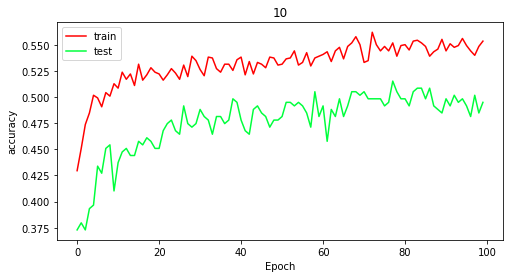

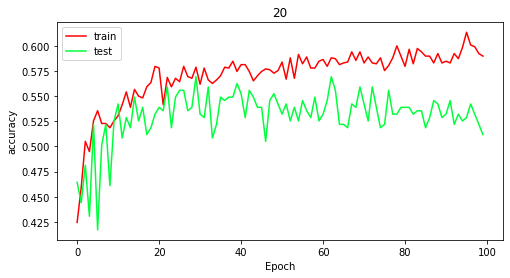

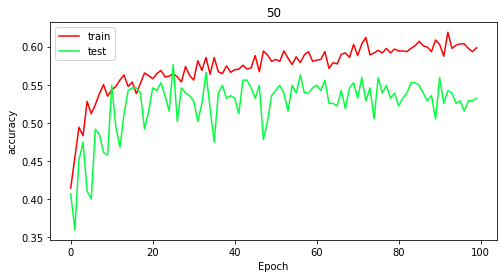

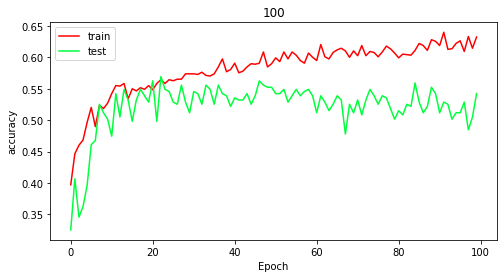

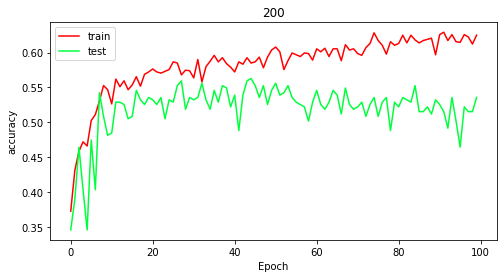

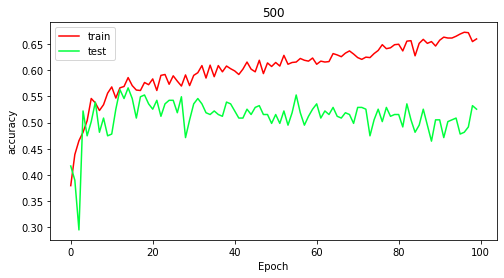

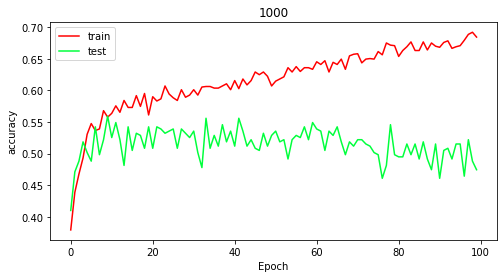

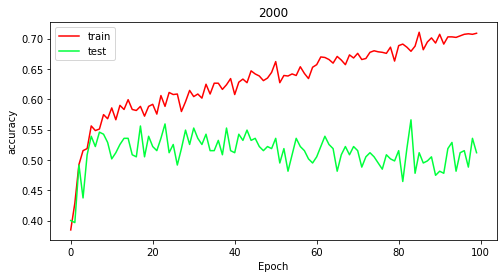

In [ ]:
my_hidden2 = {'10':10, '20':20, '50':50, '100':100, '200':200, '500':500, '1000':1000, '2000':2000}

histories = {}
for hidden_name, hid in my_hidden2.items():
    # Define a neural network

    my_network = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_dim=9),                    
                tf.keras.layers.Dense(500, activation='relu'),# z poprzedniego najlepszy wynik 500
                 tf.keras.layers.Dense(hid, activation='relu'),
                tf.keras.layers.Dense(3, activation='softmax')
                ])
    

    # Compile the model
    my_network.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9),loss='categorical_crossentropy',metrics=['accuracy'])
    # Train the model
    print('Training the model with WYMIAREM UKRYTYCH WARTSW {}'.format(hidden_name))
    histories[hidden_name] = my_network.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, verbose=1)

    prediction=my_network.predict(X_test)
    length=len(prediction)
    y_label=np.argmax(y_test,axis=1)
    predict_label_to_array=np.argmax(prediction,axis=1)+1
    predict_label=np.argmax(prediction,axis=1)

    correct_num = np.sum(y_label == predict_label)
    total_num = length
    wrong_num = total_num - correct_num
    accuracy = correct_num * 100/ total_num
    print("Accuracy: " + str(accuracy))
    print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

    print()
    print(classification_report(list(y_test_copy.values), predict_label_to_array))

plt.figure(figsize=(8, 4))


for hid_name, history in histories.items():
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.title(hid_name)
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.show()

## Inny podział danych

Próbowaliśmy rownież podziału testowych 60:40. Na 200 epokach dło to dokładność 51 %. W pewnym momencie pomimo wzrostu funkcji dla danych treningowych, funckja dla danych testowych posostaje na tej samej wysokości

In [ ]:
#Większy rozmiar danych testowych 60:40
X = df_c.drop(columns = 'Metoda antykoncepcji')
y = df_c['Metoda antykoncepcji']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=31)

print('Wymiary naszych danych: ')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_train=np_utils.to_categorical(y_train-1,num_classes=3)
y_test=np_utils.to_categorical(y_test-1,num_classes=3)

Wymiary naszych danych: 
(883, 9)
(590, 9)
(883,)
(590,)


Epoch 1/200
9/9 [==============================] - 1s 28ms/step - loss: 1.2654 - accuracy: 0.3511 - val_loss: 1.1407 - val_accuracy: 0.4305
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 1.0602 - accuracy: 0.4530 - val_loss: 1.0299 - val_accuracy: 0.4169
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 0.9977 - accuracy: 0.5198 - val_loss: 1.0244 - val_accuracy: 0.4525
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.9729 - accuracy: 0.5164 - val_loss: 1.0159 - val_accuracy: 0.4576
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 0.9608 - accuracy: 0.5300 - val_loss: 1.0055 - val_accuracy: 0.4542
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 0.9487 - accuracy: 0.5334 - val_loss: 1.0134 - val_accuracy: 0.4746
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 0.9333 - accuracy: 0.5413 - val_loss: 0.9870 - val_accuracy: 0.4983
Epoch 8/200
9/9 [========

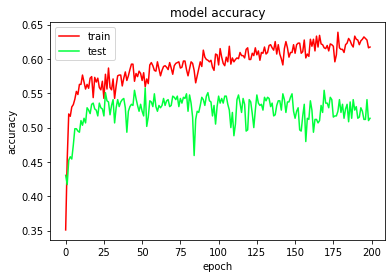

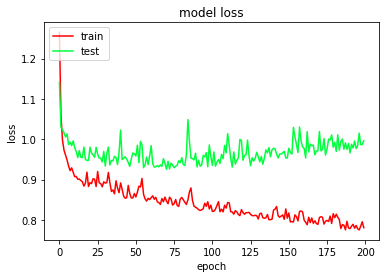

19/19 [==============================] - 0s 2ms/step
Accuracy: 51.355932203389834
Liczba prawidłowych przewidywań: 303, Ilość wierszy w zbiorze testowym: 590, Ilość błędnych przewidywań 287


In [ ]:
model6 = Sequential()
model6.add(Dense(1000,input_dim=9,activation='relu'))
model6.add(Dense(50,activation='relu'))
model6.add(Dense(3,activation='softmax'))
model6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history6 = model6.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=100,epochs=200,verbose=1)

accuracy_plot(history6)

prediction=model6.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label_to_array=np.argmax(prediction,axis=1)+1

predict_label=np.argmax(prediction,axis=1)
correct_num = np.sum(y_label == predict_label)
total_num = length
wrong_num = total_num - correct_num
accuracy = correct_num * 100/ total_num
print("Accuracy: " + str(accuracy))
print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

#Wybranie najbardziej znaczących parametrów

Przy pomocy RandomForestClassifier sprwadzilśmy jakie jest znaczenie poszczególnychkolumn w zbiorze. Następnie na tej postwawie spóbowaliśmy zrobić model z podzbioru danych. JAkowektor wejściowy tosujemy 6 kolum: 'Wiek żony' 'Dzieci', 'Index życia' ,'Edukacja żony', 'Zawód męża', 'Edukacja męża'.

Pozowoliło nam to osiągnąć dokładność 57% i najlepiej wygladające wykresu.
Przy większej ilosci epok, dokłądność się już nie zwiększała

In [ ]:
#Wybranie najbardziej znaczących cech
X_best_f = df_c.drop(columns = 'Metoda antykoncepcji')
y_best_f = df_c['Metoda antykoncepcji']
y_best_f = preprocessing.LabelEncoder().fit_transform(y_best_f)
np.unique(y_best_f, return_counts = True)

#Wybranie 9 kolumn, które posortujem według ważnosci zmiennych
num_features = 9
# Algoryt RandomForestClassifier polega na tworzeniu wielu  drzew decyzyjnych  na  podstawie  losowego  zestawu  danych

model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(X_best_f, y_best_f)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = df_c.columns[fs_indices_rfi].values
print(best_features_rfi)

feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print(feature_importances_rfi)


['Wiek żony' 'Dzieci' 'Index życia' 'Edukacja żony' 'Zawód męża'
 'Edukacja męża' 'Zatrudnienie żony' 'Religia żony' 'Ekspozycja na media']
[0.35121423 0.23565009 0.08956247 0.08421117 0.08198944 0.06523916
 0.04478562 0.03142    0.01592782]


In [ ]:
df_c['Metoda antykoncepcji'] = df_c['Metoda antykoncepcji'].astype('int')
X = df_c.drop(columns = ['Metoda antykoncepcji', 'Zatrudnienie żony', 'Religia żony' ,'Ekspozycja na media'])
y = df_c['Metoda antykoncepcji']
#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

y_train=np_utils.to_categorical(y_train-1,num_classes=3)
y_test=np_utils.to_categorical(y_test-1,num_classes=3)

Epoch 1/200
104/104 [==============================] - 1s 4ms/step - loss: 1.3525 - accuracy: 0.3472 - val_loss: 1.0506 - val_accuracy: 0.4593
Epoch 2/200
104/104 [==============================] - 0s 3ms/step - loss: 1.0617 - accuracy: 0.4442 - val_loss: 1.0149 - val_accuracy: 0.4819
Epoch 3/200
104/104 [==============================] - 0s 3ms/step - loss: 1.0313 - accuracy: 0.4636 - val_loss: 0.9958 - val_accuracy: 0.5068
Epoch 4/200
104/104 [==============================] - 0s 3ms/step - loss: 0.9979 - accuracy: 0.4966 - val_loss: 0.9757 - val_accuracy: 0.5090
Epoch 5/200
104/104 [==============================] - 0s 3ms/step - loss: 0.9933 - accuracy: 0.4840 - val_loss: 0.9551 - val_accuracy: 0.5136
Epoch 6/200
104/104 [==============================] - 0s 3ms/step - loss: 0.9880 - accuracy: 0.5005 - val_loss: 0.9511 - val_accuracy: 0.5158
Epoch 7/200
104/104 [==============================] - 0s 3ms/step - loss: 0.9750 - accuracy: 0.5112 - val_loss: 0.9437 - val_accuracy: 0.5294

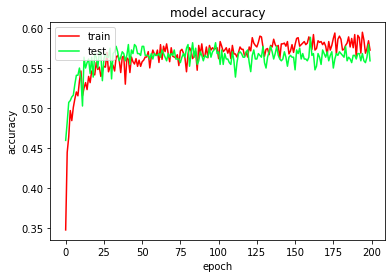

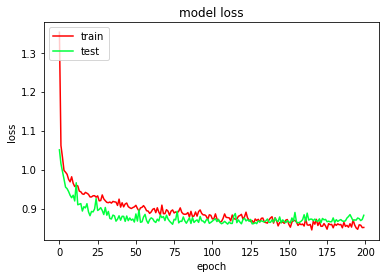

14/14 [==============================] - 0s 2ms/step
Accuracy: 55.88235294117647
Liczba prawidłowych przewidywań: 247, Ilość wierszy w zbiorze testowym: 442, Ilość błędnych przewidywań 195


In [ ]:
model7 = Sequential()
model7.add(Dense(20,input_dim=6,activation='relu'))
model7.add(Dense(20,activation='relu'))
model7.add(Dense(20,activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(3,activation='softmax'))
model7.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history7 = model7.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=200,verbose=1)

accuracy_plot(history7)

prediction=model7.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label_to_array=np.argmax(prediction,axis=1)+1
predict_label=np.argmax(prediction,axis=1)
correct_num = np.sum(y_label == predict_label)
total_num = length
wrong_num = total_num - correct_num
accuracy = correct_num * 100/ total_num
print("Accuracy: " + str(accuracy))
print("Liczba prawidłowych przewidywań: {}, Ilość wierszy w zbiorze testowym: {}, Ilość błędnych przewidywań {}".format(correct_num, total_num,wrong_num))

Sprawdziliśmy również jaką dokłądność dają wyniki innych algorytmów jak: DecisionTreeClassifier dla naszego zbioru danych. Również uzyskiwały one dokładnosć nieco ponad 50%

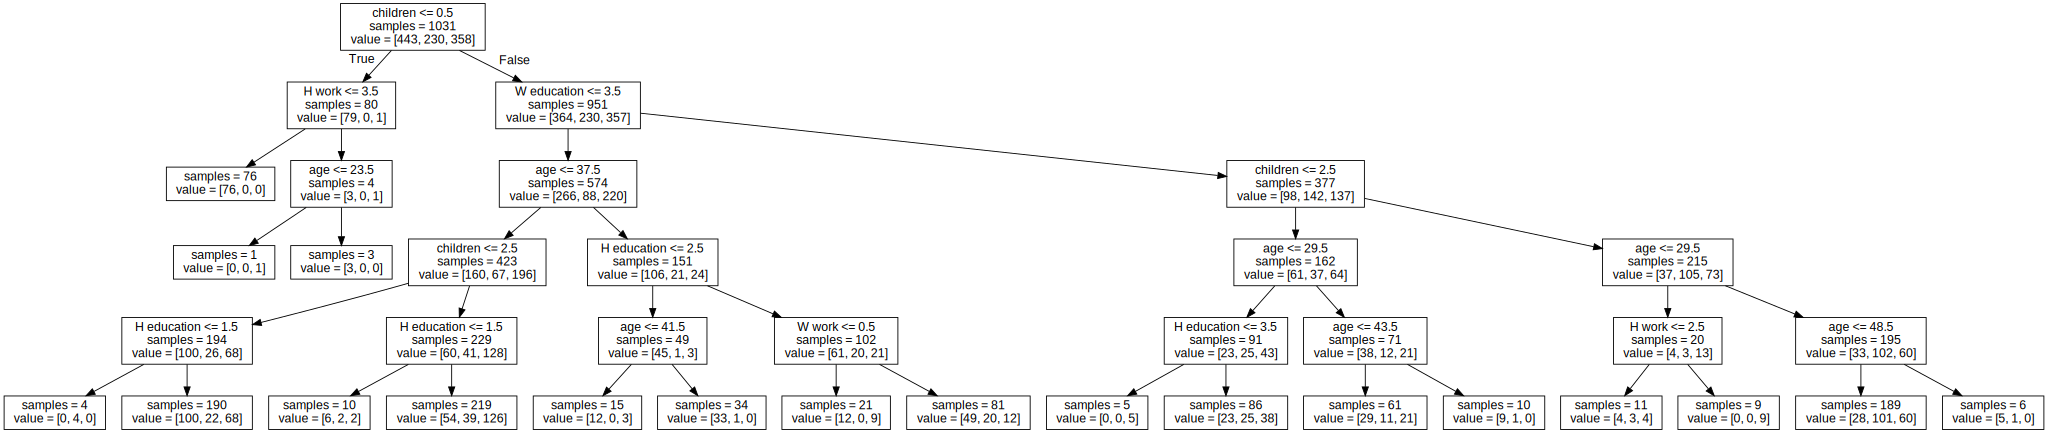

In [ ]:
#Sprawdzimy również jak na tych danych radzą sobie inne algorytmy takie jak DecisionTreeClassifier
X = df_c.drop(columns = 'Metoda antykoncepcji')
y = df_c['Metoda antykoncepcji']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

classifier = DecisionTreeClassifier(max_depth=5)
classifier = classifier.fit(X_train, y_train)

dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=["age", "W education", "H education","children","W religion","W work","H work","Strandard living","Media exposure"],
                                impurity=False) 
graph = graphviz.Source(dot_data) 

#Najważniejszą zmienną według której tworzone jest drzewo jest ilość dzieci
graph

In [ ]:
y_predict = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, y_predict))

0.5475113122171946
              precision    recall  f1-score   support

           1       0.61      0.68      0.64       186
           2       0.52      0.33      0.40       103
           3       0.48      0.53      0.50       153

    accuracy                           0.55       442
   macro avg       0.54      0.51      0.52       442
weighted avg       0.54      0.55      0.54       442



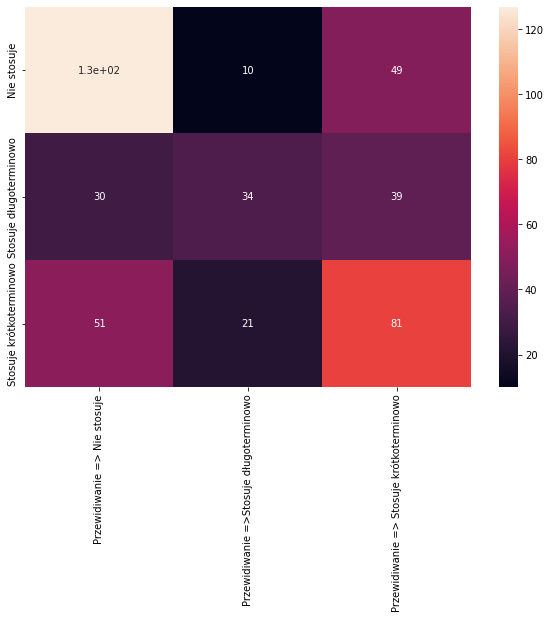

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(
    confusion_matrix, 
    index = [idx for idx in ['Nie stosuje', 'Stosuje długoterminowo', 'Stosuje krótkoterminowo']],
    columns = [col for col in ['Przewidiwanie => Nie stosuje', 'Przewidiwanie =>Stosuje długoterminowo', 'Przewidiwanie => Stosuje krótkoterminowo']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)

# Komentarze odnosnie FFNN
Ponieważ rozmiar zbioru danych jest bardzo mały mały (tylko 1473), osiągnięcie wyższej dokładności wyników, jest bardzo cieżkie do osiągnięcia. Uczenia maszynowe wymaga dużej liczby danych, aby uzyskać dokładny model. W związku z tym, jeśli do tego ćwiczenia dostępny jest większy zestaw danych, można by opracować dokładniejszy model.

Uzywskiwane przez nas wyniki są w 0kolicach 50 %, wiec nasz model radzi sobie słabo z klasyfikacją danych. Najększą wartość dokładnosci jaką udało się uzyskać w jenym teście to 57% przy wybraniu 6 najbardzje znaczących parametrów.



# Funkcje SOM

In [ ]:
df=pd.read_csv("drive/MyDrive/cmc.data", sep=',', header=None, names= ["Wife's age", "Wife's education", "Husband's education","Number of children ever born","Wife's religion","Wife's now working?","Husband's occupation","Standard-of-living index","Media exposure","Contraceptive method used"])
data_x = df.loc[:, "Wife's age":"Media exposure"]
data_y = df.loc[:,"Contraceptive method used"]

In [ ]:
#Standarization function
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

In [ ]:
# Euclidean distance
def e_distance(x,y):
    return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
    return distance.cityblock(x,y)

In [ ]:
# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0,0]
    shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
    input_data = data[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data[t])
            if distance < shortest_distance: 
                shortest_distance = distance
                winner = [row,col]
    return winner

In [ ]:
# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
    coefficient = 1.0 - (np.float64(step)/max_steps)
    learning_rate = coefficient*max_learning_rate
    neighbourhood_range = ceil(coefficient * max_m_dsitance)
    return learning_rate, neighbourhood_range

Zdecydowałem się się nie kożystać z gotowych bibliotek do utworzenia sieci SOM aby lepiej zrozumieć konstrukcję i mieć większą kontrolę nad programem. Podczas uczenia sieci użyłem funkcji


*   minmax_scalar - służy do standaryzacji danych
*   e_distance, m_distance - do obliczania odległości między punktami metryką euklidesowską i manhatańską

*   winning neuron - do obliczania najlepiej dopasowanego neuronu

*   decay - do systematycznego pomniejszania parametrów szybkości uczenia oraz zasięgu oddziaływania w kolejnych epokach

In [ ]:
#Setting grid size, learning rate, maximum distance and number of steps
num_rows = 7
num_cols = 7
max_m_dsitance = 3
max_learning_rate = 0.5
max_steps = int(2*10e2)
kf = KFold(n_splits=10, shuffle = True)

Po przeprowadzeniu wielu testów zdecydowaliśmy się na powyższe paramaetry uczenia sieci. Okazało się że podział na większą ilość klastrów wcale nie powoduje zwiększenia dokładności. Liczba epok została dobrana w ten sposób aby sieć miała wystarczająco dużo czasu na nauczenie się. Z racji na bardzo mizerne wyniki zdecydowaliśmy się użyć cross validation co poprawiło accuracy o kilka procent

# SOM - uczenie i testowanie

In [ ]:
#main function
accuracy_max = 0
for train_index, test_index in kf.split(data_x):
  train_x, test_x = data_x.loc[(df.index).isin(train_index)], data_x.loc[(df.index).isin(test_index)]
  train_y, test_y = data_y.loc[(df.index).isin(train_index)], data_y.loc[(df.index).isin(test_index)]

  train_x_norm = minmax_scaler(train_x) # normalisation

  # initialising self-organising map
  num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
  np.random.seed(40)
  som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

  # start training iterations
  for step in range(max_steps):
      learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

      t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
      winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
      for row in range(num_rows):
          for col in range(num_cols):
              if m_distance([row,col],winner) <= neighbourhood_range:
                  som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

  # collecting labels

  data = train_y
  label_data = data.to_numpy()
  map = np.empty(shape=(num_rows, num_cols), dtype=object)

  for row in range(num_rows):
      for col in range(num_cols):
          map[row][col] = [] # empty list to store the label
  for t in range(train_x_norm.shape[0]):
      winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
      map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
    
  # construct label map
  label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
  for row in range(num_rows):
      for col in range(num_cols):
          label_list = map[row][col]
          if len(label_list)==0:
              label = 2
          else:
              label = max(label_list, key=label_list.count)
          label_map[row][col] = label

  # test data

  # using the trained som, search the winning node of corresponding to the test data
  # get the label of the winning node

  data = minmax_scaler(test_x) # normalisation

  winner_labels = []
  y_label = np.zeros((test_y.size,2))
  for t in range(data.shape[0]):
      winner = winning_neuron(data, t, som, num_rows, num_cols)
      row = winner[0]
      col = winner[1]
      y_label[t][0] = row
      y_label[t][1] = col
      predicted = label_map[row][col]
      winner_labels.append(predicted)

  test_y = np.array(test_y).reshape(test_y.size,1)
  winner_labels = np.array(winner_labels).reshape(test_y.size,1)
  splited = np.concatenate((test_y, winner_labels), axis=1)
  if accuracy_score(np.array(test_y), np.array(winner_labels))>accuracy_max:
    accuracy_max = accuracy_score(np.array(test_y), np.array(winner_labels))
    label_map_max = label_map
    y_label_max = y_label

# Wykres

Accuracy:  0.4897959183673469


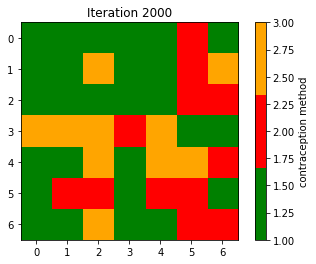

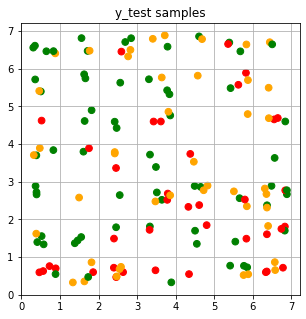

              precision    recall  f1-score   support

           1       0.52      0.68      0.59        65
           2       0.33      0.29      0.31        38
           3       0.37      0.25      0.30        44

    accuracy                           0.45       147
   macro avg       0.41      0.41      0.40       147
weighted avg       0.43      0.45      0.43       147



In [ ]:
print("Accuracy: ",accuracy_max)
title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['green', 'red', 'orange'])
plt.imshow(label_map_max, cmap=cmap)
plt.colorbar(label = "contraception method")
plt.title(title)

plt.figure(figsize=(5,5))
for y in y_label_max:
  y[0] = y[0]+0.1+(random.uniform(0.2,0.8))
  y[1] = y[1]+0.1+(random.uniform(0.2,0.8))
y_label_max = y_label_max.reshape(y_label_max.shape[1],y_label_max.shape[0])
colors = np.array(["green"])
for y in test_y:
  if y[0] == 3:
    colors = np.append(colors,"orange")
  elif y[0] == 1:
    colors = np.append(colors,"green")
  elif y[0] == 2:
    colors = np.append(colors,"red")
colors = colors[1:]
plt.title("y_test samples")
plt.grid()
plt.scatter(y_label_max[0] ,y_label_max[1], c=colors, s=45)
plt.show()
print(metrics.classification_report(np.array(test_y), np.array(winner_labels)))

Wykres na górze to podział na klastry, a wykres na dole to rozmieszczenie danych testujących, na mapie SOM. Jak wydać wyniki są dość marne i pokrywają się z accuracy na poziomie około 0.52%